Instagram data loaded.
TikTok data loaded.
YouTube data loaded.
--- Generating Project Visualizations ---

--- Plotting Subscriber Distributions ---


C:\Users\lualg\AppData\Local\Temp\ipykernel_1412\649278427.py:70: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log') # Log scale is often necessary


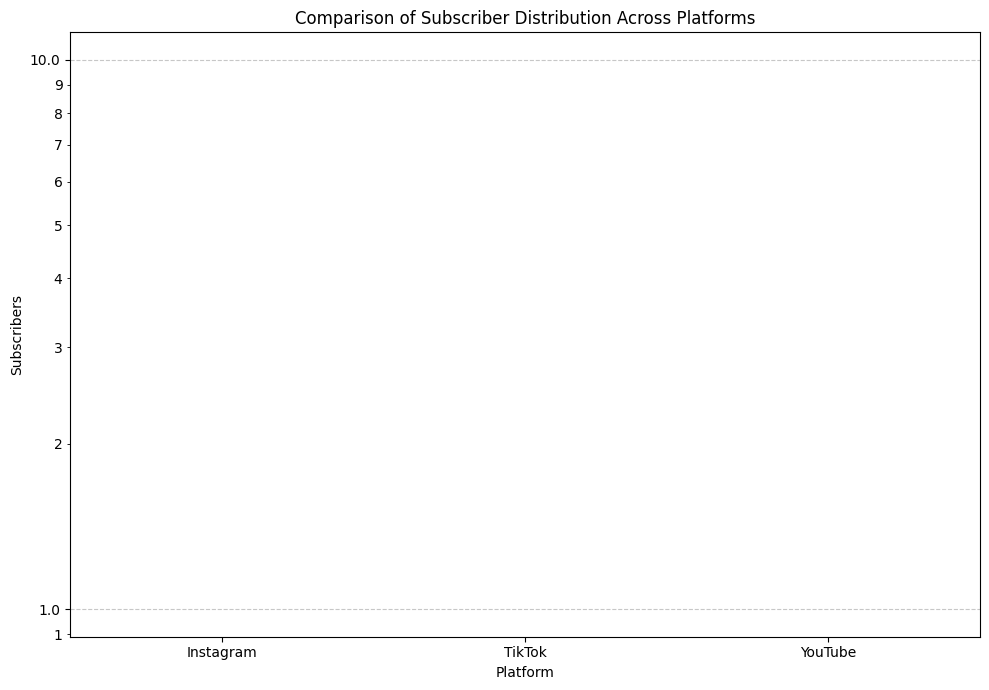

C:\Users\lualg\AppData\Local\Temp\ipykernel_1412\649278427.py:87: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


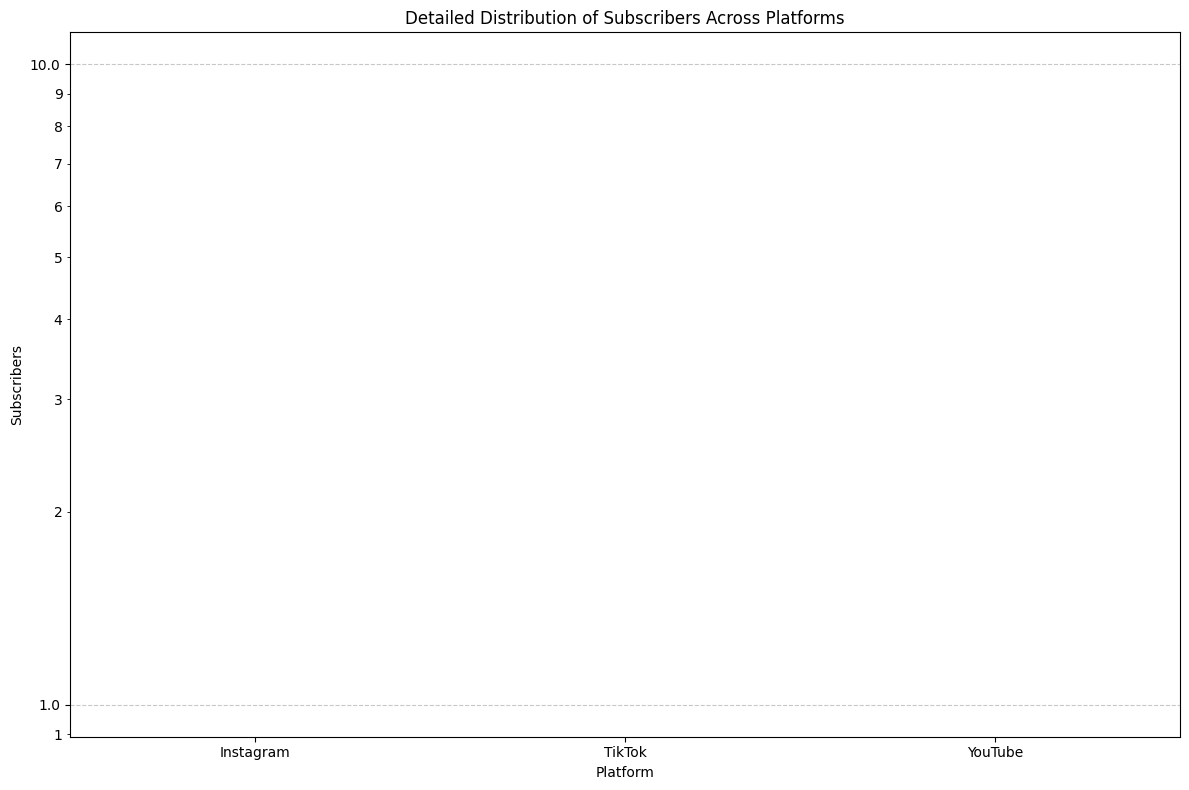


--- Plotting Content Category Distributions ---


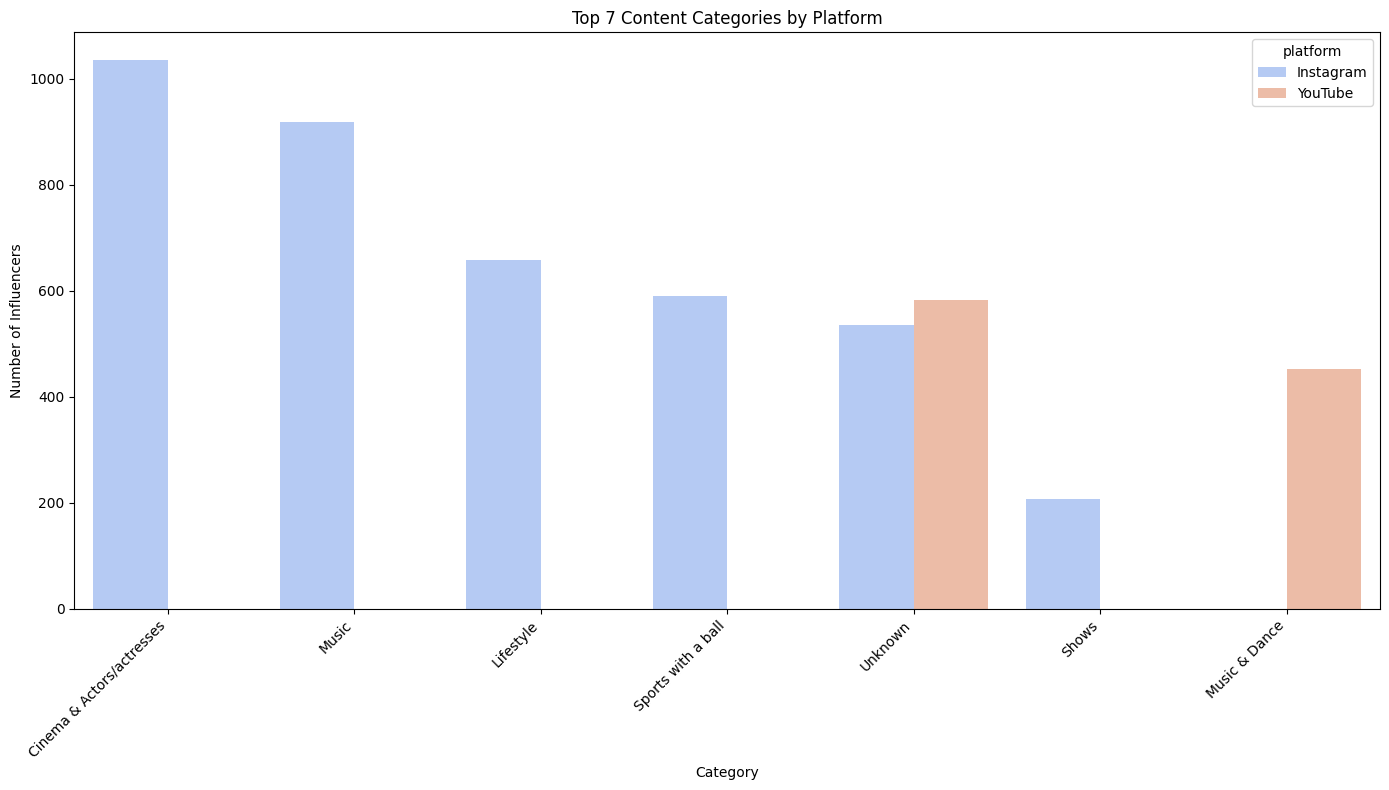


--- Plotting Influencer Tier Distributions ---


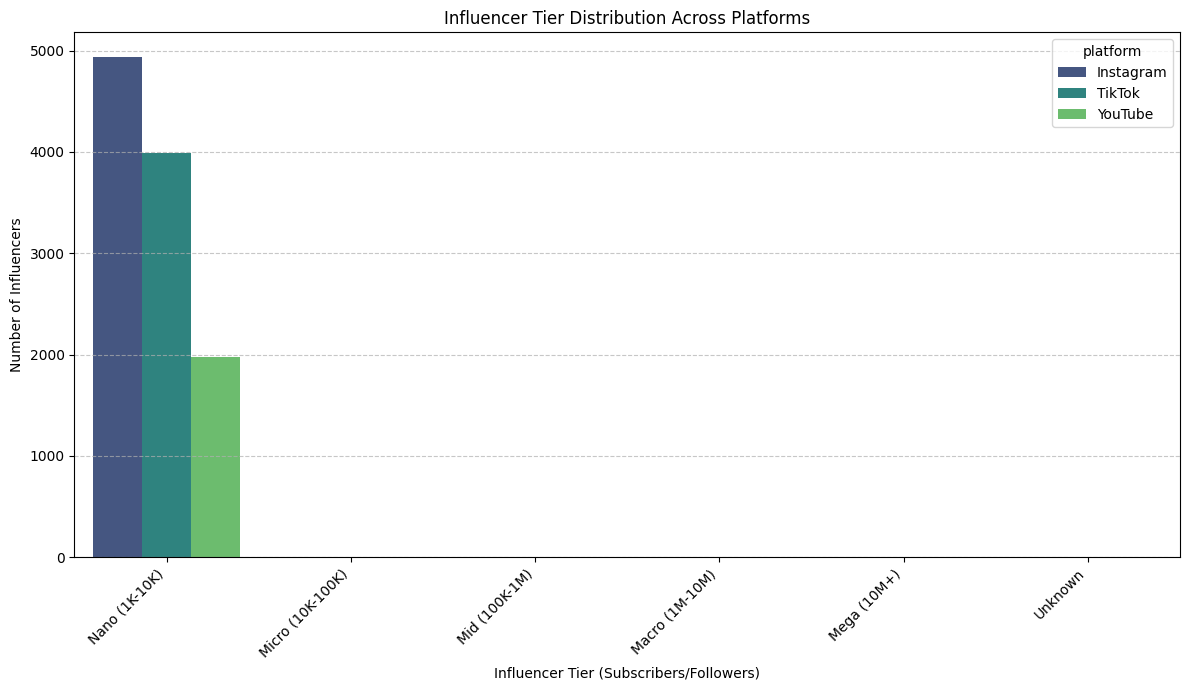

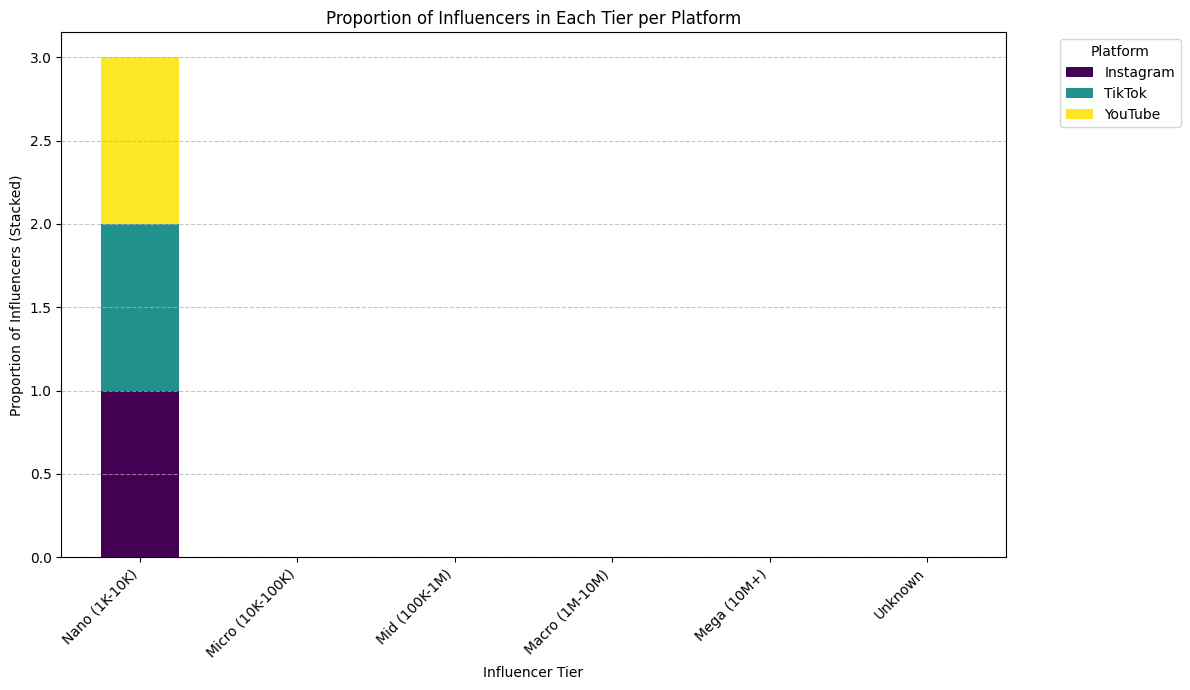


--- All Visualizations Generated ---


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter # For better axis formatting on log scales

# --- Helper Function for Influencer Tiers (Needed for Tier Visualizations) ---
def define_influencer_tier(subscribers):
    """
    Categorizes an influencer into a tier based on their subscriber count.
    Adjust these ranges as needed based on your data distribution or industry standards.
    """
    if pd.isna(subscribers):
        return 'Unknown'
    subscribers = int(subscribers)
    if subscribers < 10000:
        return 'Nano (1K-10K)'
    elif subscribers < 100000:
        return 'Micro (10K-100K)'
    elif subscribers < 1000000:
        return 'Mid (100K-1M)'
    elif subscribers < 10000000:
        return 'Macro (1M-10M)'
    else:
        return 'Mega (10M+)'

# --- Main Visualization Function ---
def generate_project_visualizations(insta_df, tiktok_df, youtube_df,
                                     # Column names for processing
                                     insta_subscriber_col='subscribers', insta_name_col='instagram_name',
                                     insta_category_col_1='category_1',
                                     tiktok_subscriber_col='subscribers', tiktok_name_col='tiktoker_name',
                                     tiktok_category_col_1='category_1',
                                     yt_subscriber_col='subscribers', yt_name_col='youtuber_name',
                                     yt_category_col_1='category_1'):
    """
    Generates a suite of visualizations for comparing social media influencer data
    across Instagram, TikTok, and YouTube.
    """
    print("--- Generating Project Visualizations ---")

    # --- 1. Subscriber Distribution Plots ---
    print("\n--- Plotting Subscriber Distributions ---")
    all_subscriber_data = []
    for platform_name, df, sub_col, name_col in [
        ('Instagram', insta_df, insta_subscriber_col, insta_name_col),
        ('TikTok', tiktok_df, tiktok_subscriber_col, tiktok_name_col),
        ('YouTube', youtube_df, yt_subscriber_col, yt_name_col)
    ]:
        if df is not None and sub_col in df.columns and name_col in df.columns:
            temp_df = df[[name_col, sub_col]].copy()
            temp_df.columns = ['influencer_name', 'subscribers']
            temp_df['platform'] = platform_name
            all_subscriber_data.append(temp_df)
        else:
            print(f"Warning: Missing data or columns for {platform_name} subscriber plots.")

    if all_subscriber_data:
        combined_subscribers_df = pd.concat(all_subscriber_data, ignore_index=True)
        combined_subscribers_df['subscribers'] = pd.to_numeric(combined_subscribers_df['subscribers'], errors='coerce')
        combined_subscribers_df.dropna(subset=['subscribers'], inplace=True)

        if not combined_subscribers_df.empty:
            # Box Plot: Subscriber Distribution
            plt.figure(figsize=(10, 7))
            ax1 = sns.boxplot(x='platform', y='subscribers', data=combined_subscribers_df)
            plt.title('Comparison of Subscriber Distribution Across Platforms')
            plt.xlabel('Platform')
            plt.ylabel('Subscribers')
            plt.yscale('log') # Log scale is often necessary

            formatter = ScalarFormatter()
            formatter.set_scientific(False)
            formatter.set_powerlimits((-3, 6))
            ax1.yaxis.set_major_formatter(formatter)
            ax1.yaxis.set_minor_formatter(formatter)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

            # Violin Plot: Subscriber Distribution
            plt.figure(figsize=(12, 8))
            ax2 = sns.violinplot(x='platform', y='subscribers', data=combined_subscribers_df)
            plt.title('Detailed Distribution of Subscribers Across Platforms')
            plt.xlabel('Platform')
            plt.ylabel('Subscribers')
            plt.yscale('log')

            formatter2 = ScalarFormatter()
            formatter2.set_scientific(False)
            formatter2.set_powerlimits((-3, 6))
            ax2.yaxis.set_major_formatter(formatter2)
            ax2.yaxis.set_minor_formatter(formatter2)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
        else:
            print("Skipping subscriber plots: No valid numeric subscriber data after cleaning.")
    else:
        print("Skipping subscriber plots: No subscriber data for any platform to combine.")


    # --- 2. Content Category Distribution Plots ---
    print("\n--- Plotting Content Category Distributions ---")
    all_categories_data = []
    for platform_name, df, cat_col in [
        ('Instagram', insta_df, insta_category_col_1),
        ('TikTok', tiktok_df, tiktok_category_col_1),
        ('YouTube', youtube_df, yt_category_col_1)
    ]:
        if df is not None and cat_col in df.columns:
            categories = df[cat_col].dropna().astype(str).str.strip() # Ensure string and strip whitespace
            if not categories.empty:
                category_counts = categories.value_counts().reset_index()
                category_counts.columns = ['category', 'count']
                category_counts['platform'] = platform_name
                all_categories_data.append(category_counts)
            else:
                print(f"Warning: No valid categories found for {platform_name}.")
        else:
            print(f"Warning: Missing data or primary category column for {platform_name} category plots.")

    if all_categories_data:
        combined_categories_df = pd.concat(all_categories_data, ignore_index=True)
        if not combined_categories_df.empty:
            num_top_categories_to_plot = 7 # Adjust as desired
            # Get top N overall, then filter for categories present in top N across all platforms
            top_overall_categories = combined_categories_df.groupby('category')['count'].sum().nlargest(num_top_categories_to_plot).index

            plt.figure(figsize=(14, 8))
            sns.barplot(
                x='category',
                y='count',
                hue='platform',
                data=combined_categories_df[combined_categories_df['category'].isin(top_overall_categories)],
                palette='coolwarm',
                errorbar=None # Don't show error bars for count
            )
            plt.title(f'Top {num_top_categories_to_plot} Content Categories by Platform')
            plt.xlabel('Category')
            plt.ylabel('Number of Influencers')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("Skipping category plots: No valid category data after cleaning.")
    else:
        print("Skipping category plots: No category data for any platform to combine.")


    # --- 3. Influencer Tier Distribution Plots ---
    print("\n--- Plotting Influencer Tier Distributions ---")
    all_influencers_data_for_tiers = []
    for platform_name, df, sub_col, name_col in [
        ('Instagram', insta_df, insta_subscriber_col, insta_name_col),
        ('TikTok', tiktok_df, tiktok_subscriber_col, tiktok_name_col),
        ('YouTube', youtube_df, yt_subscriber_col, yt_name_col)
    ]:
        if df is not None and sub_col in df.columns and name_col in df.columns:
            temp_df = df[[name_col, sub_col]].copy()
            temp_df.columns = ['influencer_name', 'subscribers']
            temp_df['platform'] = platform_name
            all_influencers_data_for_tiers.append(temp_df)
        else:
            print(f"Warning: Missing data or columns for {platform_name} tier plots.")

    if all_influencers_data_for_tiers:
        combined_influencers_df = pd.concat(all_influencers_data_for_tiers, ignore_index=True)
        combined_influencers_df['subscribers'] = pd.to_numeric(combined_influencers_df['subscribers'], errors='coerce')
        combined_influencers_df.dropna(subset=['subscribers'], inplace=True)

        if not combined_influencers_df.empty:
            combined_influencers_df['tier'] = combined_influencers_df['subscribers'].apply(define_influencer_tier)
            tier_order = ['Nano (1K-10K)', 'Micro (10K-100K)', 'Mid (100K-1M)', 'Macro (1M-10M)', 'Mega (10M+)', 'Unknown']
            combined_influencers_df['tier'] = pd.Categorical(combined_influencers_df['tier'], categories=tier_order, ordered=True)

            # Count Plot: Tier Distribution by Platform
            plt.figure(figsize=(12, 7))
            sns.countplot(x='tier', hue='platform', data=combined_influencers_df, palette='viridis', order=tier_order)
            plt.title('Influencer Tier Distribution Across Platforms')
            plt.xlabel('Influencer Tier (Subscribers/Followers)')
            plt.ylabel('Number of Influencers')
            plt.xticks(rotation=45, ha='right')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

            # Stacked Bar Chart for Percentage View
            # Calculate percentages for stacked bar chart
            tier_proportions = combined_influencers_df.groupby('platform')['tier'].value_counts(normalize=True).unstack(fill_value=0)
            tier_proportions = tier_proportions[tier_order].T # Transpose and ensure order

            plt.figure(figsize=(12, 7))
            tier_proportions.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='viridis', ax=plt.gca()) # Use ax=plt.gca()
            plt.title('Proportion of Influencers in Each Tier per Platform')
            plt.xlabel('Influencer Tier')
            plt.ylabel('Proportion of Influencers (Stacked)')
            plt.xticks(rotation=45, ha='right')
            plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

        else:
            print("Skipping tier plots: No valid numeric subscriber data after cleaning for tier analysis.")
    else:
        print("Skipping tier plots: No influencer data for any platform to combine for tiers.")

    print("\n--- All Visualizations Generated ---")


# --- Example Data Loading (Replace with your actual data loading) ---
# IMPORTANT: These are placeholders. You MUST replace these with your actual
# pd.read_csv() or pd.read_excel() calls to load your dataframes.
# Make sure your CSV files are in the same directory as your Python script,
# or provide the full path to the files.

try:
    # Ensure these columns exist in your Instagram data
    insta_df = pd.read_csv('./Clean_Data/merged_instagram_data_cleaned.csv')
    print("Instagram data loaded.")
except FileNotFoundError:
    print("instagram_data.csv not found. Please check the file path.")
    insta_df = None

try:
    # Ensure these columns exist in your TikTok data
    tiktok_df = pd.read_csv('./Clean_Data/merged_tiktok_data_cleaned.csv')
    print("TikTok data loaded.")
except FileNotFoundError:
    print("tiktok_data.csv not found. Please check the file path.")
    tiktok_df = None

try:
    # Ensure these columns exist in your YouTube data
    youtube_df = pd.read_csv('./Clean_Data/merged_youtube_data_cleaned.csv')
    print("YouTube data loaded.")
except FileNotFoundError:
    print("youtube_data.csv not found. Please check the file path.")
    youtube_df = None

# --- Call the Main Visualization Function ---
# Ensure the column names here EXACTLY match the column names in your loaded DataFrames.
generate_project_visualizations(
    insta_df=insta_df,
    tiktok_df=tiktok_df,
    youtube_df=youtube_df,
    insta_subscriber_col='subscribers', # Adjust if different
    insta_name_col='instagram_name',
    insta_category_col_1='category_1', # Adjust if different
    tiktok_subscriber_col='subscribers',# Adjust if different
    tiktok_name_col='tiktoker_name',
    tiktok_category_col_1='category_1', # Adjust if different
    yt_subscriber_col='subscribers',    # Adjust if different
    yt_name_col='youtuber_name',
    yt_category_col_1='category_1'      # Adjust if different
)